# Cellpose Segmentation

In [1]:
import os

import h5py
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from scportrait.pipeline.featurization import CellFeaturizer
from scportrait.pipeline.extraction import HDF5CellExtraction
from scportrait.pipeline.project import Project
from scportrait.pipeline.segmentation.workflows import CytosolSegmentationCellpose
from scportrait.pipeline.selection import LMDSelection

/Users/sophia/mambaforge/envs/scportrait_new/lib/python3.10/site-packages/dask/dataframe/__init__.py:31: FutureWarning: The legacy Dask DataFrame implementation is deprecated and will be removed in a future version. Set the configuration option `dataframe.query-planning` to `True` or None to enable the new Dask Dataframe implementation and silence this warning.
  warnings.warn(
/Users/sophia/mambaforge/envs/scportrait_new/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
project_location = "project"

project = Project(
    os.path.abspath(project_location),
    config_path="config_example1.yml",
    overwrite=True,
    debug=True,
    segmentation_f=CytosolSegmentationCellpose,
    extraction_f=HDF5CellExtraction,
)

Updating project config file.
[05/12/2024 01:08:52] Loading config from /Users/sophia/Documents/GitHub/scPortrait/examples/notebooks/development/project/config.yml


In [4]:
from scportrait.data._datasets import dataset_1

dataset_1_path = dataset_1()

# these example images are downloaded from the human protein atlas (www.proteinatlas.org)
images = [f"{dataset_1_path}/Ch1.tif", f"{dataset_1_path}/Ch2.tif", f"{dataset_1_path }/Ch3.tif"]

project.load_input_from_tif_files(images)

[05/12/2024 01:08:52] Output location /Users/sophia/Documents/GitHub/scPortrait/examples/notebooks/development/project/scportrait.sdata already exists. Overwriting.
INFO     The Zarr backing store has been changed from None the new file path:                                      
         /Users/sophia/Documents/GitHub/scPortrait/examples/notebooks/development/project/scportrait.sdata         
[05/12/2024 01:08:52] Initialized temporary directory at /Users/sophia/Documents/GitHub/scPortrait/examples/notebooks/development/Project_a058xglr for Project
[05/12/2024 01:08:52] Image input_image written to sdata object.
[05/12/2024 01:08:52] Cleaned up temporary directory at <TemporaryDirectory '/Users/sophia/Documents/GitHub/scPortrait/examples/notebooks/development/Project_a058xglr'>


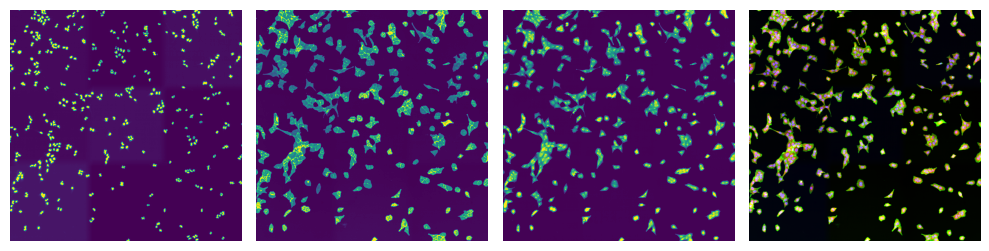

In [5]:
# visualize input images as example
# it is not recommended to execute this block with large input images as it will compute for some time

def colorize(im, color, clip_percentile=0.0):
    """
    Helper function to create an RGB image from a single-channel image using a
    specific color.
    """
    # Check that we do just have a 2D image
    if im.ndim > 2 and im.shape[2] != 1:
        raise ValueError("This function expects a single-channel image!")

    # Rescale the image according to how we want to display it
    im_scaled = im.astype(np.float32) - np.percentile(im, clip_percentile)
    im_scaled = im_scaled / np.percentile(im_scaled, 100 - clip_percentile)
    im_scaled = np.clip(im_scaled, 0, 1)

    # Need to make sure we have a channels dimension for the multiplication to work
    im_scaled = np.atleast_3d(im_scaled)

    # Reshape the color (here, we assume channels last)
    color = np.asarray(color).reshape((1, 1, -1))
    return im_scaled * color


def generate_composite(images, colors=None, plot=False):
    if colors is None:
        colors = [(0, 0, 1), (0, 1, 0), (1, 0, 0), (1, 0, 1)]
    colorized = []
    for image, color in zip(images, colors, strict=False):
        image = colorize(image, color, 0.0)
        colorized.append(image)

    if plot:
        for i in colorized:
            plt.figure()
            plt.imshow(i)

    image = colorized[0]
    for i in range(len(colorized) - 1):
        image += colorized[i + 1]

    return np.clip(image, 0, 1)


fig, axs = plt.subplots(1, 4, figsize=(10, 4))
axs[0].imshow(project.input_image[0])
axs[0].axis("off")

axs[1].imshow(project.input_image[1])
axs[1].axis("off")

axs[2].imshow(project.input_image[2])
axs[2].axis("off")

img = generate_composite(project.input_image)

axs[3].imshow(img)
axs[3].axis("off")

fig.tight_layout()

[05/12/2024 01:08:54] Initialized temporary directory at /var/folders/35/p4c58_4n3bb0bxnzgns1t7kh0000gn/T/./CytosolSegmentationCellpose_ggu6j3ll for CytosolSegmentationCellpose
[05/12/2024 01:08:54] For cytosol segmentation using the maximum intensity projection of channels [1, 2].
[05/12/2024 01:08:54] GPU Status for segmentation is True and will segment using the following device mps.


/Users/sophia/mambaforge/envs/scportrait_new/lib/python3.10/site-packages/cellpose/resnet_torch.py:276: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state_dict = torch.load

[05/12/2024 01:08:54] Segmenting nucleus using the following model: nuclei


/Users/sophia/mambaforge/envs/scportrait_new/lib/python3.10/site-packages/cellpose/resnet_torch.py:276: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state_dict = torch.load

[05/12/2024 01:09:03] Segmenting cytosol using the following model: cyto2


/Users/sophia/mambaforge/envs/scportrait_new/lib/python3.10/site-packages/cellpose/dynamics.py:189: RuntimeWarning: invalid value encountered in divide
  mu /= (1e-60 + (mu**2).sum(axis=0)**0.5)


[05/12/2024 01:09:14] Performing filtering to match Cytosol and Nucleus IDs.
[05/12/2024 01:09:25] Removed 148 nuclei and 61 cytosols due to filtering.
[05/12/2024 01:09:25] After filtering, 378 matching nuclei and cytosol masks remain.
[05/12/2024 01:09:27] Total time to perform nucleus and cytosol mask matching filtering: 13.02 seconds
[05/12/2024 01:09:27] Segmentation seg_all_nucleus written to sdata object.
[05/12/2024 01:09:27] Segmentation seg_all_cytosol written to sdata object.
[05/12/2024 01:09:27] Cleaned up temporary directory at <TemporaryDirectory '/var/folders/35/p4c58_4n3bb0bxnzgns1t7kh0000gn/T/./CytosolSegmentationCellpose_ggu6j3ll'>


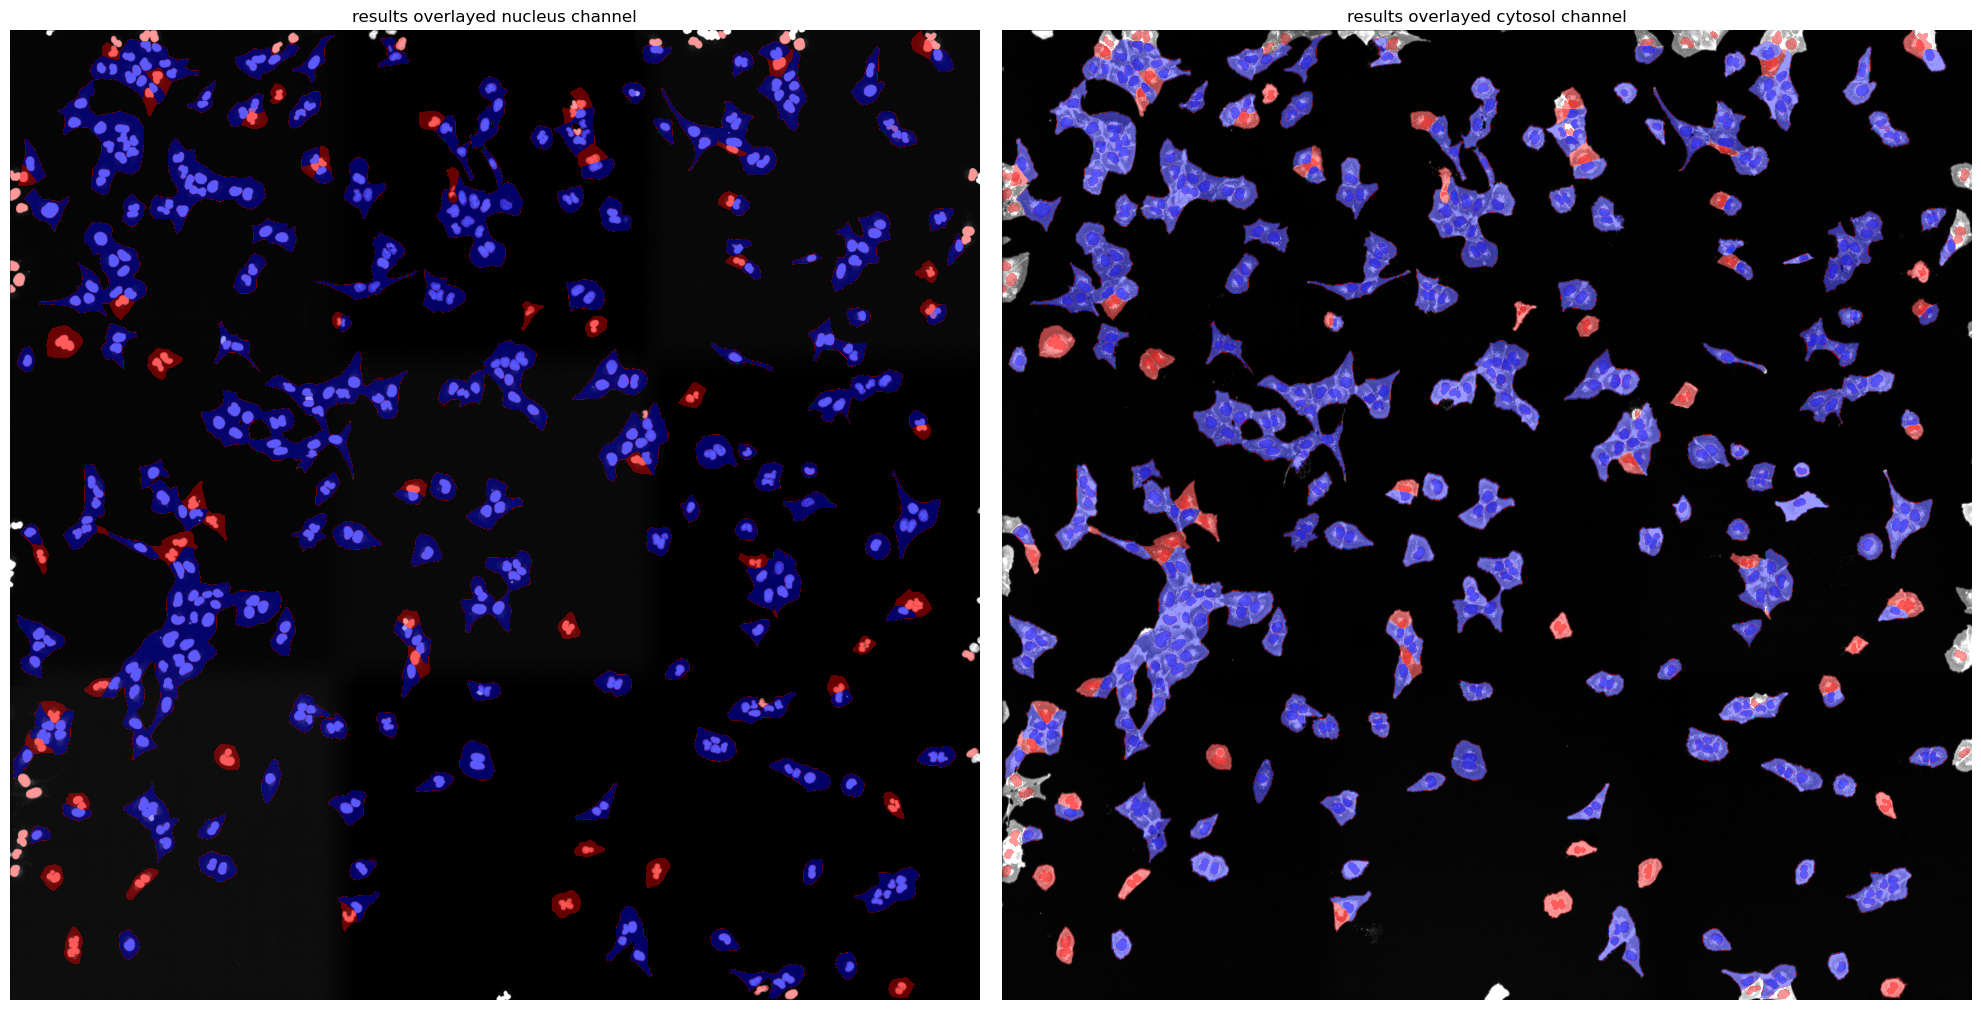

In [6]:
project.segment()

(-0.5, 3036.5, 3038.5, -0.5)

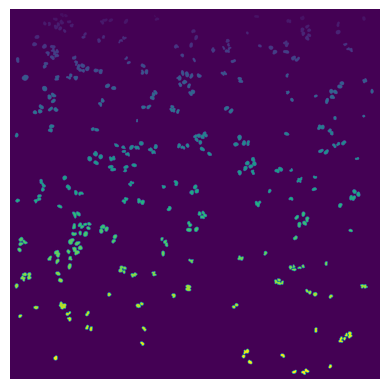

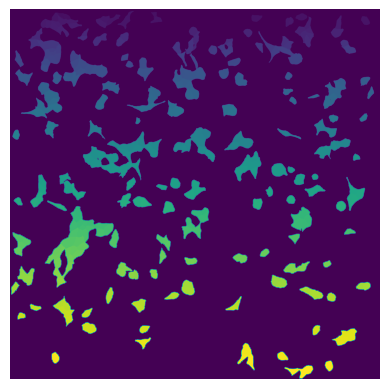

In [7]:
plt.figure()
plt.imshow(project.sdata["seg_all_nucleus"])
plt.axis("off")

plt.figure()
plt.imshow(project.sdata["seg_all_cytosol"])
plt.axis("off")

(-0.5, 3036.5, 3038.5, -0.5)

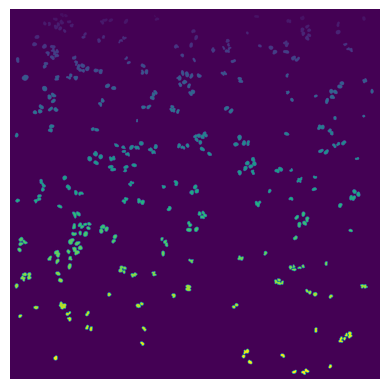

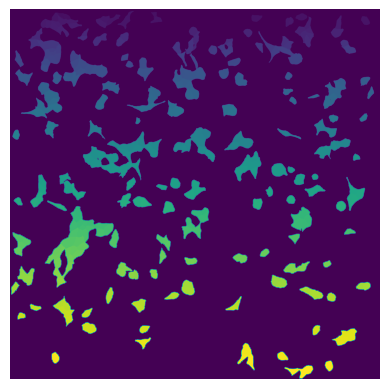

In [8]:
plt.figure()
plt.imshow(project.sdata["seg_all_nucleus"])
plt.axis("off")

plt.figure()
plt.imshow(project.sdata["seg_all_cytosol"])
plt.axis("off")

[05/12/2024 01:09:30] Initialized temporary directory at /var/folders/35/p4c58_4n3bb0bxnzgns1t7kh0000gn/T/./HDF5CellExtraction_2u5e2ste for HDF5CellExtraction
[05/12/2024 01:09:30] Created new directory for extraction results: /Users/sophia/Documents/GitHub/scPortrait/examples/notebooks/development/project/extraction/data
[05/12/2024 01:09:30] Setup output folder at /Users/sophia/Documents/GitHub/scPortrait/examples/notebooks/development/project/extraction/data
[05/12/2024 01:09:30] Found 2 segmentation masks for the given key in the sdata object. Will be extracting single-cell images based on these masks: ['seg_all_nucleus', 'seg_all_cytosol']
[05/12/2024 01:09:30] Using seg_all_nucleus as the main segmentation mask to determine cell centers.
[05/12/2024 01:09:32] Points centers_cells written to sdata object.
[05/12/2024 01:09:32] Extraction Details:
[05/12/2024 01:09:32] --------------------------------
[05/12/2024 01:09:32] Number of input image channels: 3
[05/12/2024 01:09:32] Num

Processing cell batches: 100%|██████████| 4/4 [00:00<00:00,  6.99it/s]
/Users/sophia/Documents/GitHub/scPortrait/src/scportrait/pipeline/extraction.py:639: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


multiprocessing done.
[05/12/2024 01:09:33] Finished extraction in 0.74 seconds (513.21 cells / second)
[05/12/2024 01:09:33] Transferring results to final HDF5 data container.
[05/12/2024 01:09:33] number of cells too close to image edges to extract: 10
[05/12/2024 01:09:33] A total of 10 cells were too close to the image border to be extracted. Their cell_ids were saved to file /Users/sophia/Documents/GitHub/scPortrait/examples/notebooks/development/project/segmentation/removed_classes.csv.
[05/12/2024 01:09:34] Transferring extracted single cells to .hdf5
[05/12/2024 01:09:34] single-cell index created.
[05/12/2024 01:09:34] single-cell data created
[05/12/2024 01:09:34] single-cell index labelled created.
[05/12/2024 01:09:34] channel information created.
[05/12/2024 01:09:34] Benchmarking times saved to file.
[05/12/2024 01:09:34] Cleaned up temporary directory at <TemporaryDirectory '/var/folders/35/p4c58_4n3bb0bxnzgns1t7kh0000gn/T/./HDF5CellExtraction_2u5e2ste'>


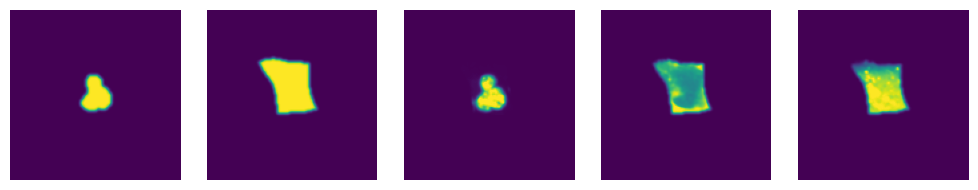

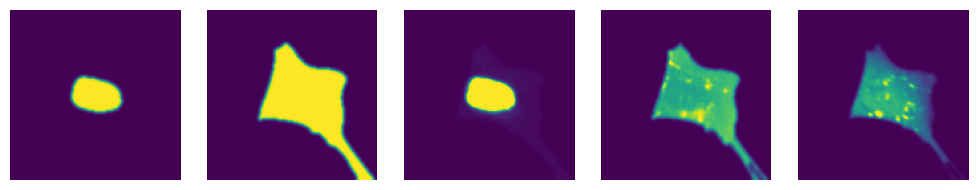

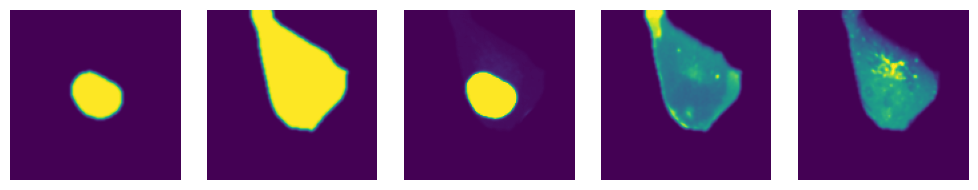

In [9]:
project.extract()

(368, 5, 128, 128)


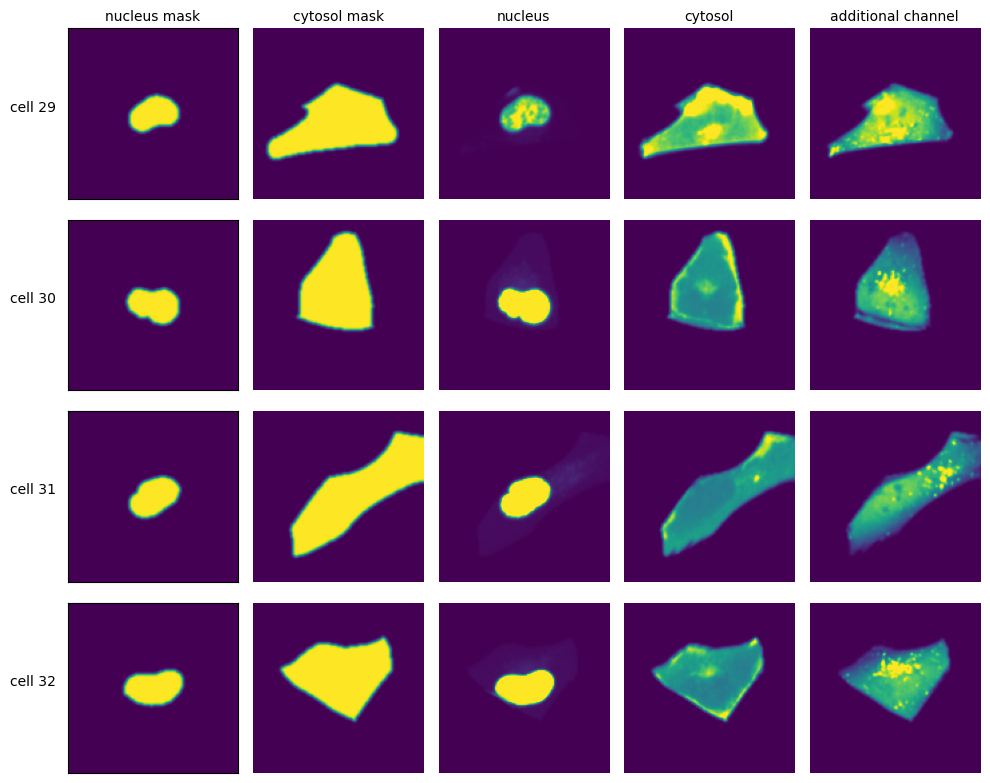

In [10]:
with h5py.File(f"{project_location}/extraction/data/single_cells.h5") as hf:
    index = hf.get("single_cell_index")
    images = hf.get("single_cell_data")

    print(images.shape)

    n_cells = [2, 3, 4, 5]
    fig, axs = plt.subplots(len(n_cells), 5, figsize=(5 * 2, len(n_cells) * 2))
    labels = ["nucleus mask", "cytosol mask", "nucleus", "cytosol", "additional channel"]

    for i, id in enumerate(n_cells):
        cell_id = index[id][1]
        image = images[id]

        for n, _img in enumerate(image):
            axs[i, n].imshow(_img)

            if n == 0:
                axs[i, n].set_ylabel(f"cell {cell_id}", fontsize=10, rotation=0, labelpad=25)
                axs[i, n].xaxis.set_visible(False)
                axs[i, n].tick_params(left=False, labelleft=False)
            else:
                axs[i, n].axis("off")

            if i == 0:
                axs[i, n].set_title(labels[n], fontsize=10)
    fig.tight_layout()